In [263]:
%cd /Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc/tutorials/scl-11
!make -j4
mbconvert="/Users/likask/mofem_install/spack/opt/spack/darwin-bigsur-skylake/apple-clang-13.0.0/moab-5.3.0-dzgcpvccvq4puezkjzxbgniorggv4jc5/bin/mbconvert"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc/tutorials/scl-11
cd /Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc && /usr/local/Cellar/cmake/3.19.5/bin/cmake -S/Users/likask/mofem_install/mofem-cephas/mofem/users_modules -B/Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc --check-build-system CMakeFiles/Makefile.cmake 0
cd /Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc && /usr/local/Cellar/cmake/3.19.5/bin/cmake -E cmake_progress_start /Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc/CMakeFiles /Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc/tutorials/scl-11//CMakeFiles/progress.marks
cd /Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc && /Applications/Xcode.app/Contents/Developer/usr/bin/make  -f CMakeFiles/Makefile2 tutorials/scl-11/all


In [264]:
def run_test(order, penalty, phi, nitche):
  !./poisson_2d_dis_galerkin \
    -file_name mesh2d.cub \
    -order {order} -penalty {penalty} -phi {phi} -nitsche {nitche} 2>&1 | tee log
  l2_norm =!grep L2 log | awk '{print $7}'
  l2_norm = float(l2_norm[1])
  energy_norm =!grep Energetic log | awk '{print $7}'
  energy_norm = float(energy_norm[0])
  h1_norm =!grep H1 log | awk '{print $7}'
  h1_norm = float(h1_norm[0])
  return [l2_norm, energy_norm, h1_norm]
  
[l2_norm, energy_norm, h1_norm] = run_test(1, 1e2, -1, 1)
print('L2 norm %6.4e ' % l2_norm)
print('Energy norm %6.4e ' % energy_norm)
print('H1 norm %6.4e ' % h1_norm)

!{mbconvert} out_result.h5m out_result.vtk


[0] <inform> MoFEM version 0.13.0 (MOAB 5.3.0 Petsc Release Version 3.16.1, Nov 01, 2021 )
[0] <inform> git commit id 4b6c0696659e08b4f78b7e0d538f701093d5c260
[0] <inform> Local time: 2022-Mar-13 18:29:47
[0] <inform> UTC time: 2022-Mar-13 18:29:47
[0] <inform> [MeshsetMng] meshset 12682136550675316746 type BLOCKSET UNKNOWNNAME msId 1 name BOUNDARY_CONDITION block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> Set order: 1
[0] <inform> Set penalty: 100
[0] <inform> Set phi: -1
[0] <inform> Set nitche: 1
[0] <inform> [FieldCore] Add field U field_id 1 space L2 approximation base AINSWORTH_BERNSTEIN_BEZIER_BASE rank 1 meshset 12682136550675316747
[0] <inform> [FECore] Add finite element dFE
[0] <inform> [FECore] Add finite element bFE
[0] <inform> [FECore] Add finite element sFE
[0] <inform> [ProblemCore] Add problem SimpleProblem
[0] <inform> [FieldCore] Number of dofs 696
[0] <inform> [FECore] Finite element dFE added. Nb. of elements added 232
[0] <inform>

In [267]:
penalty = 1e1
order_list = []
l2_norm_phi_m_1_list = []
l2_norm_phi_0_list = []
l2_norm_phi_1_list = []
l2_norm_phi_penalty_list = []
energy_norm_phi_m_1_list = []
energy_norm_phi_0_list = []
energy_norm_phi_1_list = []
energy_norm_phi_penalty_list = []
for o in range(1, 6):
  print('Order %d' % o)
  order_list.append(o)
  p = (o*(o+1))*penalty
  [l2_norm_penalty, energy_norm_penalty,
   h1_norm_penalty] = run_test(o, p, 0, 0)
  [l2_norm_phi_m_1, energy_norm_phi_m_1,
   h1_norm_phi_m_1] = run_test(o, p, -1, 1)
  [l2_norm_phi_0, energy_norm_phi_0, h1_norm_phi_0] = run_test(o, p, 0, 1)
  [l2_norm_phi_1, energy_norm_phi_1, h1_norm_phi_1] = run_test(o, p, 1, 1)
  l2_norm_phi_m_1_list.append(l2_norm_phi_m_1)
  l2_norm_phi_penalty_list.append(l2_norm_penalty)
  l2_norm_phi_0_list.append(l2_norm_phi_0)
  l2_norm_phi_1_list.append(l2_norm_phi_1)
  energy_norm_phi_m_1_list.append(energy_norm_phi_m_1)
  energy_norm_phi_penalty_list.append(energy_norm_penalty)
  energy_norm_phi_0_list.append(energy_norm_phi_0)
  energy_norm_phi_1_list.append(energy_norm_phi_1)


Order 1
[0] <inform> MoFEM version 0.13.0 (MOAB 5.3.0 Petsc Release Version 3.16.1, Nov 01, 2021 )
[0] <inform> git commit id 4b6c0696659e08b4f78b7e0d538f701093d5c260
[0] <inform> Local time: 2022-Mar-13 18:30:34
[0] <inform> UTC time: 2022-Mar-13 18:30:34
[0] <inform> [MeshsetMng] meshset 12682136550675316746 type BLOCKSET UNKNOWNNAME msId 1 name BOUNDARY_CONDITION block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> Set order: 1
[0] <inform> Set penalty: 20
[0] <inform> Set phi: 0
[0] <inform> Set nitche: 0
[0] <inform> [FieldCore] Add field U field_id 1 space L2 approximation base AINSWORTH_BERNSTEIN_BEZIER_BASE rank 1 meshset 12682136550675316747
[0] <inform> [FECore] Add finite element dFE
[0] <inform> [FECore] Add finite element bFE
[0] <inform> [FECore] Add finite element sFE
[0] <inform> [ProblemCore] Add problem SimpleProblem
[0] <inform> [FieldCore] Number of dofs 696
[0] <inform> [FECore] Finite element dFE added. Nb. of elements added 232
[0] <i

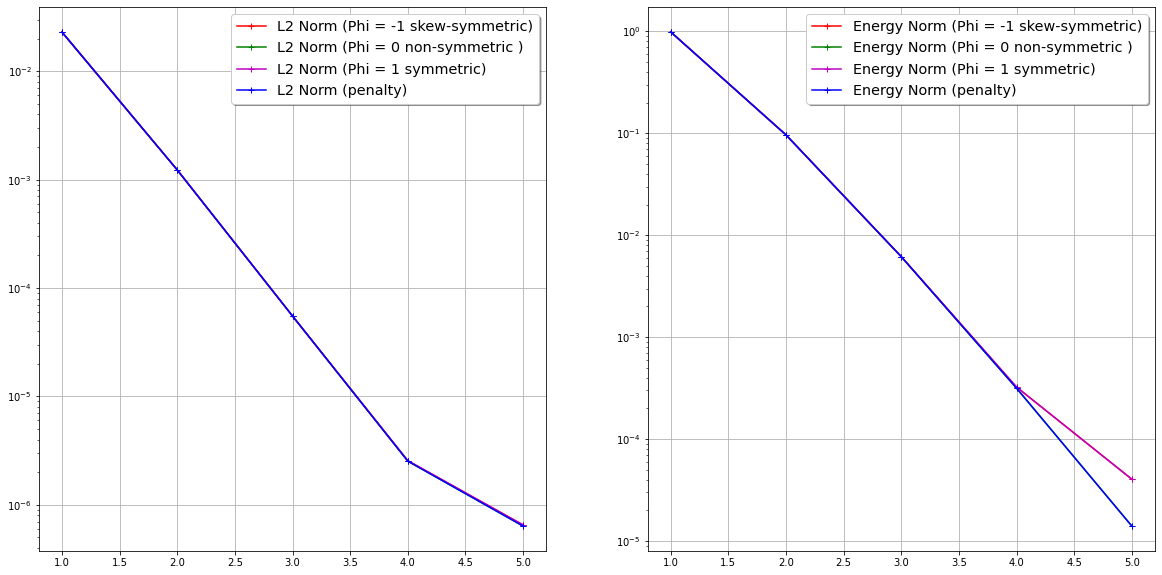

In [271]:
# plot
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots(1,2)
ax[0].set_yscale('log')
ax[0].plot(order_list, l2_norm_phi_m_1_list, 'r+-', label='L2 Norm (Phi = -1 skew-symmetric)') 
ax[0].plot(order_list, l2_norm_phi_0_list, 'g+-', label='L2 Norm (Phi = 0 non-symmetric )') 
ax[0].plot(order_list, l2_norm_phi_1_list, 'm+-', label='L2 Norm (Phi = 1 symmetric)')
ax[0].plot(order_list, l2_norm_phi_penalty_list, 'b+-', label='L2 Norm (penalty)') 
legend = ax[0].legend(loc='upper right', shadow=True, fontsize='x-large')
ax[0].grid(True);
ax[1].set_yscale('log')
ax[1].plot(order_list, energy_norm_phi_m_1_list, 'r+-', label='Energy Norm (Phi = -1 skew-symmetric)') 
ax[1].plot(order_list, energy_norm_phi_0_list, 'g+-', label='Energy Norm (Phi = 0 non-symmetric )') 
ax[1].plot(order_list, energy_norm_phi_1_list, 'm+-', label='Energy Norm (Phi = 1 symmetric)')
ax[1].plot(order_list, energy_norm_phi_penalty_list, 'b+-', label='Energy Norm (penalty)') 
legend = ax[1].legend(loc='upper right', shadow=True, fontsize='x-large')
ax[1].grid(True)